[View in Colaboratory](https://colab.research.google.com/github/harvinder-power/machine-learning/blob/master/F_AI_Lession_1.ipynb)

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
!pip install fastai
!pip install pathlib
!pip install kaggle
!apt-get install unzip

torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [102]:
#Download the dataset
!wget http://files.fast.ai/data/dogscats.zip

--2018-05-27 14:52:06--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  24.8MB/s    in 30s     

2018-05-27 14:52:36 (27.2 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [0]:
mkdir /content/data

In [109]:
#Unzip files in train zip file to the data folder
!unzip /content/dogscats.zip -d /content/data

Archive:  /content/dogscats.zip
   creating: /content/data/dogscats/
   creating: /content/data/dogscats/sample/
   creating: /content/data/dogscats/sample/train/
   creating: /content/data/dogscats/sample/train/cats/
  inflating: /content/data/dogscats/sample/train/cats/cat.2921.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.394.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.4865.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.3570.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.2266.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.9021.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.11737.jpg  
  inflating: /content/data/dogscats/sample/train/cats/cat.4600.jpg  
   creating: /content/data/dogscats/sample/train/dogs/
  inflating: /content/data/dogscats/sample/train/dogs/dog.1402.jpg  
  inflating: /content/data/dogscats/sample/train/dogs/dog.1614.jpg  
  inflating: /content/data/dogscats/s


  inflating: /content/data/dogscats/train/cats/cat.8530.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8282.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7916.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4976.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5313.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10088.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1437.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2492.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4951.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4167.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3453.jpg  
  inflating: /content/data/dogscats/train/cats/cat.461.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8477.jpg  
  inflating: /content/data/dogscats/train/cats/cat.332.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2513.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8088.jpg  
  inflat


  inflating: /content/data/dogscats/train/cats/cat.6074.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3389.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2268.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8674.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10941.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6264.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7211.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8344.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1162.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8680.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1914.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2952.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1213.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9489.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10129.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10681.jpg  
  in

  inflating: /content/data/dogscats/train/cats/cat.8753.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4351.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4204.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8237.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6837.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4657.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6056.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2482.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8700.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6355.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3206.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3357.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11621.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1654.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6112.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12211.jpg  
  infl


  inflating: /content/data/dogscats/train/cats/cat.8287.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6961.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5292.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9596.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7017.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6639.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12117.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8646.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6284.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4146.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11833.jpg  
  inflating: /content/data/dogscats/train/cats/cat.396.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10378.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7647.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6782.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7520.jpg  
  inf

  inflating: /content/data/dogscats/train/cats/cat.9550.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4281.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3629.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3597.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10908.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1734.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3244.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10470.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6430.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10459.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8907.jpg  
  inflating: /content/data/dogscats/train/cats/cat.901.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6865.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1988.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3469.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5205.jpg  
  infl


  inflating: /content/data/dogscats/train/cats/cat.4902.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5029.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1688.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9170.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1725.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5700.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1658.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10912.jpg  
  inflating: /content/data/dogscats/train/cats/cat.453.jpg  
  inflating: /content/data/dogscats/train/cats/cat.646.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4673.jpg  
  inflating: /content/data/dogscats/train/cats/cat.507.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2187.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9327.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8047.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1672.jpg  
  inflati

  inflating: /content/data/dogscats/train/cats/cat.10199.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9506.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5629.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2698.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10186.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10399.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6467.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4164.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3282.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10732.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3984.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6407.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4612.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10058.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2165.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2380.jpg  
  i


  inflating: /content/data/dogscats/train/cats/cat.4893.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5918.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6293.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3852.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9743.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1663.jpg  
  inflating: /content/data/dogscats/train/cats/cat.674.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11826.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12037.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12094.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12172.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9209.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6224.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9588.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2792.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4054.jpg  
  in


  inflating: /content/data/dogscats/train/cats/cat.12487.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8489.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8013.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12427.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11234.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1172.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8633.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12206.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7168.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8838.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4214.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7673.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12336.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2097.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1513.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1906.jpg  
  


  inflating: /content/data/dogscats/train/cats/cat.9797.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10978.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2378.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11881.jpg  
  inflating: /content/data/dogscats/train/cats/cat.667.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11525.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5428.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9335.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6750.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11125.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11486.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11064.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3944.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6279.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3349.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7601.jpg  
  


  inflating: /content/data/dogscats/train/cats/cat.3280.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9049.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9728.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4126.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4298.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8310.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6604.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8026.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7613.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5926.jpg  
  inflating: /content/data/dogscats/train/cats/cat.654.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8660.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11130.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6432.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5337.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4841.jpg  
  infla


  inflating: /content/data/dogscats/train/cats/cat.167.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9523.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5402.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11351.jpg  
  inflating: /content/data/dogscats/train/cats/cat.928.jpg  
  inflating: /content/data/dogscats/train/cats/cat.713.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3126.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1832.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1564.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9222.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10345.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4605.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9643.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6487.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1627.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4576.jpg  
  inflat


  inflating: /content/data/dogscats/train/cats/cat.11954.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4152.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4583.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8545.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9981.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3408.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1550.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7354.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6843.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5380.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1148.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10970.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12195.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9223.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9114.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6115.jpg  
  in

  inflating: /content/data/dogscats/train/cats/cat.10824.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10568.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4737.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10165.jpg  
  inflating: /content/data/dogscats/train/cats/cat.946.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10614.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6101.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5950.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9553.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2296.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8070.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6856.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7832.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1593.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9057.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6204.jpg  
  inf

  inflating: /content/data/dogscats/train/cats/cat.1791.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11039.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9748.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3977.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10846.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12383.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6265.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1259.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12078.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1431.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2323.jpg  
  inflating: /content/data/dogscats/train/cats/cat.969.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9774.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6450.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4349.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6504.jpg  
  inf


  inflating: /content/data/dogscats/train/cats/cat.7620.jpg  
  inflating: /content/data/dogscats/train/cats/cat.883.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6707.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7658.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1804.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3222.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6006.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11034.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5510.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6717.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8424.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4632.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3334.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3979.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2800.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9031.jpg  
  infla


  inflating: /content/data/dogscats/train/cats/cat.11369.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10472.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5310.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11809.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3514.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11935.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5059.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7985.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8215.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1286.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5896.jpg  
  inflating: /content/data/dogscats/train/cats/cat.862.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8247.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11114.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3891.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7633.jpg  
  i

  inflating: /content/data/dogscats/train/cats/cat.5042.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6507.jpg  
  inflating: /content/data/dogscats/train/cats/cat.206.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6221.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5572.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3926.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7218.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9495.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11801.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1931.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9706.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6702.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6151.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8298.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2988.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2825.jpg  
  inflat

  inflating: /content/data/dogscats/train/cats/cat.7076.jpg  
  inflating: /content/data/dogscats/train/cats/cat.532.jpg  
  inflating: /content/data/dogscats/train/cats/cat.951.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8231.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3484.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3780.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5523.jpg  
  inflating: /content/data/dogscats/train/cats/cat.126.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4542.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12189.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7894.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9438.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11812.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8473.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3352.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4547.jpg  
  inflati


  inflating: /content/data/dogscats/train/cats/cat.10.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3293.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11201.jpg  
  inflating: /content/data/dogscats/train/cats/cat.464.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4588.jpg  
  inflating: /content/data/dogscats/train/cats/cat.7790.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11057.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6920.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1578.jpg  
  inflating: /content/data/dogscats/train/cats/cat.3101.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10659.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10039.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1537.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5139.jpg  
  inflating: /content/data/dogscats/train/cats/cat.422.jpg  
  inflating: /content/data/dogscats/train/cats/cat.8563.jpg  
  infla


  inflating: /content/data/dogscats/train/cats/cat.498.jpg  
  inflating: /content/data/dogscats/train/cats/cat.652.jpg  
  inflating: /content/data/dogscats/train/cats/cat.10296.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5178.jpg  
  inflating: /content/data/dogscats/train/cats/cat.6529.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1996.jpg  
  inflating: /content/data/dogscats/train/cats/cat.12299.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5746.jpg  
  inflating: /content/data/dogscats/train/cats/cat.11332.jpg  
  inflating: /content/data/dogscats/train/cats/cat.898.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2141.jpg  
  inflating: /content/data/dogscats/train/cats/cat.9242.jpg  
  inflating: /content/data/dogscats/train/cats/cat.4056.jpg  
  inflating: /content/data/dogscats/train/cats/cat.2119.jpg  
  inflating: /content/data/dogscats/train/cats/cat.1521.jpg  
  inflating: /content/data/dogscats/train/cats/cat.5459.jpg  
  infla


  inflating: /content/data/dogscats/train/dogs/dog.9933.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4711.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3145.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6461.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4126.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11247.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11769.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10178.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8199.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12223.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10911.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6734.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9657.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2373.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.275.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8468.jpg  
  i


  inflating: /content/data/dogscats/train/dogs/dog.9615.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5865.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4082.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9273.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11637.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3404.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3635.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.701.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5256.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3921.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.850.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4738.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6489.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1588.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6588.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1072.jpg  
  inflat


  inflating: /content/data/dogscats/train/dogs/dog.1829.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12476.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11051.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10115.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2858.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10311.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7499.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10791.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10813.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5472.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3892.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3549.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4366.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6909.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4812.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3990.jpg  
 


  inflating: /content/data/dogscats/train/dogs/dog.5920.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1952.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7005.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.377.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6598.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7402.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6857.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6981.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11694.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7541.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3585.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9087.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1526.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9484.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5849.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7120.jpg  
  infla


  inflating: /content/data/dogscats/train/dogs/dog.3430.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9942.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9861.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5848.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8115.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2404.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11152.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12235.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5687.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4508.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11747.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2272.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1047.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3542.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2856.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8843.jpg  
  in


  inflating: /content/data/dogscats/train/dogs/dog.8832.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.516.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1641.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5480.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11234.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3675.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.115.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2208.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2217.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3011.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1842.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8086.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11489.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5619.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11822.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10415.jpg  
  inf


  inflating: /content/data/dogscats/train/dogs/dog.3240.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8667.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9989.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2584.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4971.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10435.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2157.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9272.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2414.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4590.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9874.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10971.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2290.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2401.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.461.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.242.jpg  
  infla

  inflating: /content/data/dogscats/train/dogs/dog.4779.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4249.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7195.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8474.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11327.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11339.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1158.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12413.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3191.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5498.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8386.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11443.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1045.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2576.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5389.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3135.jpg  
  in

  inflating: /content/data/dogscats/train/dogs/dog.4743.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11077.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11318.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9463.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12044.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12341.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6816.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9518.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10610.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9043.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8719.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2626.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3314.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1181.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2948.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12237.jpg  
  


  inflating: /content/data/dogscats/train/dogs/dog.10786.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12420.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.774.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3046.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1066.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8663.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8733.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1945.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9095.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1563.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8445.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7854.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11493.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.385.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.215.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10096.jpg  
  infl


  inflating: /content/data/dogscats/train/dogs/dog.9988.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4502.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9446.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3674.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2356.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11890.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9249.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11497.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9022.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11662.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8404.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8163.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3376.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7502.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2004.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7260.jpg  
  in


  inflating: /content/data/dogscats/train/dogs/dog.8655.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11740.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5995.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.387.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3771.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10840.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10196.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7783.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5928.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6485.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6633.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1742.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3852.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10478.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4789.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9647.jpg  
  in


  inflating: /content/data/dogscats/train/dogs/dog.7352.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7262.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5408.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10778.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2885.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7069.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8078.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10790.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6384.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3186.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12004.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8408.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.49.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2359.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3930.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10116.jpg  
  inf


  inflating: /content/data/dogscats/train/dogs/dog.298.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5420.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8414.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1592.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5508.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8554.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6479.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10168.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12105.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.910.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6672.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8208.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10267.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11791.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7378.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10659.jpg  
  in


  inflating: /content/data/dogscats/train/dogs/dog.7076.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11370.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4612.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2095.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1823.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12017.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3383.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2905.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2171.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.582.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8261.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8788.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2776.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1173.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8652.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1267.jpg  
  infl

  inflating: /content/data/dogscats/train/dogs/dog.8823.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2692.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12257.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2241.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11800.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7464.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6454.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8734.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4735.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9987.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7019.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4488.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10305.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6058.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11193.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4813.jpg  
  in


  inflating: /content/data/dogscats/train/dogs/dog.2463.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4582.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8536.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5503.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5524.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8710.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6801.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2080.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9773.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6864.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8967.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1690.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.180.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1782.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1039.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3511.jpg  
  inflat


  inflating: /content/data/dogscats/train/dogs/dog.11827.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11154.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11591.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6279.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7934.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4442.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11767.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4741.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8284.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1704.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.241.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12066.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7504.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10138.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6159.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4976.jpg  
  

  inflating: /content/data/dogscats/train/dogs/dog.7997.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4143.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3206.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12071.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11187.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1218.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11762.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5873.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10528.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1549.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1316.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11252.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9003.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9852.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8973.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7034.jpg  
  i


  inflating: /content/data/dogscats/train/dogs/dog.672.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2926.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2729.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4765.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8260.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8498.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1985.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8714.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11617.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9559.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3938.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3665.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3112.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9876.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3611.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.9814.jpg  
  infla


  inflating: /content/data/dogscats/train/dogs/dog.600.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.444.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7143.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5459.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.2249.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.380.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7688.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10289.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7936.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8211.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.10566.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.5455.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1541.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8098.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.1209.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8513.jpg  
  inflat


  inflating: /content/data/dogscats/train/dogs/dog.889.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.7505.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3645.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4906.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6815.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6689.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11619.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.12273.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3912.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.8865.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11986.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6288.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.6538.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.11644.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.3972.jpg  
  inflating: /content/data/dogscats/train/dogs/dog.4315.jpg  
  in

  inflating: /content/data/dogscats/valid/cats/cat.4324.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.5092.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.1648.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.9442.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.1659.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.12187.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.9579.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.7061.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.5353.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.954.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.3166.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.1103.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.602.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.1351.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.5935.jpg  
  inflating: /content/data/dogscats/valid/cats/cat.2521.jpg  
  inflati


  inflating: /content/data/dogscats/valid/dogs/dog.5176.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.191.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.8449.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.8416.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.5722.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.8073.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.8411.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.1859.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.237.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.2560.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.4428.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.12148.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.5671.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.4870.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.11496.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.3767.jpg  
  infla

  inflating: /content/data/dogscats/valid/dogs/dog.10880.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.5649.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.3418.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.183.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.938.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.11026.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.10252.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.2493.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.4696.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.10296.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.3492.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.5201.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.11969.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.7642.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.8321.jpg  
  inflating: /content/data/dogscats/valid/dogs/dog.10750.jpg  
  in


  inflating: /content/data/dogscats/test1/9418.jpg  
  inflating: /content/data/dogscats/test1/953.jpg  
  inflating: /content/data/dogscats/test1/7288.jpg  
  inflating: /content/data/dogscats/test1/3654.jpg  
  inflating: /content/data/dogscats/test1/197.jpg  
  inflating: /content/data/dogscats/test1/8233.jpg  
  inflating: /content/data/dogscats/test1/3732.jpg  
  inflating: /content/data/dogscats/test1/7965.jpg  
  inflating: /content/data/dogscats/test1/5811.jpg  
  inflating: /content/data/dogscats/test1/9338.jpg  
  inflating: /content/data/dogscats/test1/11816.jpg  
  inflating: /content/data/dogscats/test1/4134.jpg  
  inflating: /content/data/dogscats/test1/2352.jpg  
  inflating: /content/data/dogscats/test1/11984.jpg  
  inflating: /content/data/dogscats/test1/11651.jpg  
  inflating: /content/data/dogscats/test1/3182.jpg  
  inflating: /content/data/dogscats/test1/8008.jpg  
  inflating: /content/data/dogscats/test1/2265.jpg  
  inflating: /content/data/dogscats/test1/88

  inflating: /content/data/dogscats/test1/2023.jpg  
  inflating: /content/data/dogscats/test1/3586.jpg  
  inflating: /content/data/dogscats/test1/11390.jpg  
  inflating: /content/data/dogscats/test1/9919.jpg  
  inflating: /content/data/dogscats/test1/2636.jpg  
  inflating: /content/data/dogscats/test1/7024.jpg  
  inflating: /content/data/dogscats/test1/12330.jpg  
  inflating: /content/data/dogscats/test1/2678.jpg  
  inflating: /content/data/dogscats/test1/3915.jpg  
  inflating: /content/data/dogscats/test1/2133.jpg  
  inflating: /content/data/dogscats/test1/2654.jpg  
  inflating: /content/data/dogscats/test1/7474.jpg  
  inflating: /content/data/dogscats/test1/1095.jpg  
  inflating: /content/data/dogscats/test1/7978.jpg  
  inflating: /content/data/dogscats/test1/5962.jpg  
  inflating: /content/data/dogscats/test1/689.jpg  
  inflating: /content/data/dogscats/test1/9260.jpg  
  inflating: /content/data/dogscats/test1/1061.jpg  
  inflating: /content/data/dogscats/test1/460


  inflating: /content/data/dogscats/test1/11274.jpg  
  inflating: /content/data/dogscats/test1/10221.jpg  
  inflating: /content/data/dogscats/test1/9339.jpg  
  inflating: /content/data/dogscats/test1/8492.jpg  
  inflating: /content/data/dogscats/test1/8942.jpg  
  inflating: /content/data/dogscats/test1/10342.jpg  
  inflating: /content/data/dogscats/test1/5520.jpg  
  inflating: /content/data/dogscats/test1/2507.jpg  
  inflating: /content/data/dogscats/test1/5064.jpg  
  inflating: /content/data/dogscats/test1/12123.jpg  
  inflating: /content/data/dogscats/test1/9630.jpg  
  inflating: /content/data/dogscats/test1/9838.jpg  
  inflating: /content/data/dogscats/test1/6534.jpg  
  inflating: /content/data/dogscats/test1/2957.jpg  
  inflating: /content/data/dogscats/test1/4307.jpg  
  inflating: /content/data/dogscats/test1/4623.jpg  
  inflating: /content/data/dogscats/test1/6953.jpg  
  inflating: /content/data/dogscats/test1/6339.jpg  
  inflating: /content/data/dogscats/test1

  inflating: /content/data/dogscats/test1/1326.jpg  
  inflating: /content/data/dogscats/test1/10916.jpg  
  inflating: /content/data/dogscats/test1/9151.jpg  
  inflating: /content/data/dogscats/test1/3504.jpg  
  inflating: /content/data/dogscats/test1/8070.jpg  
  inflating: /content/data/dogscats/test1/11822.jpg  
  inflating: /content/data/dogscats/test1/2012.jpg  
  inflating: /content/data/dogscats/test1/85.jpg  
  inflating: /content/data/dogscats/test1/219.jpg  
  inflating: /content/data/dogscats/test1/669.jpg  
  inflating: /content/data/dogscats/test1/3463.jpg  
  inflating: /content/data/dogscats/test1/7776.jpg  
  inflating: /content/data/dogscats/test1/1996.jpg  
  inflating: /content/data/dogscats/test1/9535.jpg  
  inflating: /content/data/dogscats/test1/7176.jpg  
  inflating: /content/data/dogscats/test1/4858.jpg  
  inflating: /content/data/dogscats/test1/7407.jpg  
  inflating: /content/data/dogscats/test1/11257.jpg  
  inflating: /content/data/dogscats/test1/8198.

  inflating: /content/data/dogscats/test1/5240.jpg  
  inflating: /content/data/dogscats/test1/9711.jpg  
  inflating: /content/data/dogscats/test1/7713.jpg  
  inflating: /content/data/dogscats/test1/4726.jpg  
  inflating: /content/data/dogscats/test1/9928.jpg  
  inflating: /content/data/dogscats/test1/11576.jpg  
  inflating: /content/data/dogscats/test1/6095.jpg  
  inflating: /content/data/dogscats/test1/6008.jpg  
  inflating: /content/data/dogscats/test1/1620.jpg  
  inflating: /content/data/dogscats/test1/10388.jpg  
  inflating: /content/data/dogscats/test1/9905.jpg  
  inflating: /content/data/dogscats/test1/11249.jpg  
  inflating: /content/data/dogscats/test1/3992.jpg  
  inflating: /content/data/dogscats/test1/7341.jpg  
  inflating: /content/data/dogscats/test1/8010.jpg  
  inflating: /content/data/dogscats/test1/1516.jpg  
  inflating: /content/data/dogscats/test1/1338.jpg  
  inflating: /content/data/dogscats/test1/7785.jpg  
  inflating: /content/data/dogscats/test1/8

  inflating: /content/data/dogscats/test1/5779.jpg  
  inflating: /content/data/dogscats/test1/4437.jpg  
  inflating: /content/data/dogscats/test1/2312.jpg  
  inflating: /content/data/dogscats/test1/10825.jpg  
  inflating: /content/data/dogscats/test1/596.jpg  
  inflating: /content/data/dogscats/test1/714.jpg  
  inflating: /content/data/dogscats/test1/2759.jpg  
  inflating: /content/data/dogscats/test1/1304.jpg  
  inflating: /content/data/dogscats/test1/3678.jpg  
  inflating: /content/data/dogscats/test1/2323.jpg  
  inflating: /content/data/dogscats/test1/1918.jpg  
  inflating: /content/data/dogscats/test1/9225.jpg  
  inflating: /content/data/dogscats/test1/487.jpg  
  inflating: /content/data/dogscats/test1/9016.jpg  
  inflating: /content/data/dogscats/test1/5546.jpg  
  inflating: /content/data/dogscats/test1/1808.jpg  
  inflating: /content/data/dogscats/test1/6886.jpg  
  inflating: /content/data/dogscats/test1/10618.jpg  
  inflating: /content/data/dogscats/test1/6357.


  inflating: /content/data/dogscats/test1/8119.jpg  
  inflating: /content/data/dogscats/test1/11642.jpg  
  inflating: /content/data/dogscats/test1/778.jpg  
  inflating: /content/data/dogscats/test1/10279.jpg  
  inflating: /content/data/dogscats/test1/12140.jpg  
  inflating: /content/data/dogscats/test1/6942.jpg  
  inflating: /content/data/dogscats/test1/2917.jpg  
  inflating: /content/data/dogscats/test1/6139.jpg  
  inflating: /content/data/dogscats/test1/6978.jpg  
  inflating: /content/data/dogscats/test1/2273.jpg  
  inflating: /content/data/dogscats/test1/14.jpg  
  inflating: /content/data/dogscats/test1/10290.jpg  
  inflating: /content/data/dogscats/test1/8470.jpg  
  inflating: /content/data/dogscats/test1/3755.jpg  
  inflating: /content/data/dogscats/test1/787.jpg  
  inflating: /content/data/dogscats/test1/5718.jpg  
  inflating: /content/data/dogscats/test1/10211.jpg  
  inflating: /content/data/dogscats/test1/6920.jpg  
  inflating: /content/data/dogscats/test1/48


  inflating: /content/data/dogscats/test1/3812.jpg  
  inflating: /content/data/dogscats/test1/1319.jpg  
  inflating: /content/data/dogscats/test1/10664.jpg  
  inflating: /content/data/dogscats/test1/9832.jpg  
  inflating: /content/data/dogscats/test1/1360.jpg  
  inflating: /content/data/dogscats/test1/7454.jpg  
  inflating: /content/data/dogscats/test1/12200.jpg  
  inflating: /content/data/dogscats/test1/4426.jpg  
  inflating: /content/data/dogscats/test1/1356.jpg  
  inflating: /content/data/dogscats/test1/10917.jpg  
  inflating: /content/data/dogscats/test1/1240.jpg  
  inflating: /content/data/dogscats/test1/10821.jpg  
  inflating: /content/data/dogscats/test1/1435.jpg  
  inflating: /content/data/dogscats/test1/2886.jpg  
  inflating: /content/data/dogscats/test1/6733.jpg  
  inflating: /content/data/dogscats/test1/7061.jpg  
  inflating: /content/data/dogscats/test1/9675.jpg  
  inflating: /content/data/dogscats/test1/8997.jpg  
  inflating: /content/data/dogscats/test1

  inflating: /content/data/dogscats/test1/8609.jpg  
  inflating: /content/data/dogscats/test1/9730.jpg  
  inflating: /content/data/dogscats/test1/3072.jpg  
  inflating: /content/data/dogscats/test1/9770.jpg  
  inflating: /content/data/dogscats/test1/7453.jpg  
  inflating: /content/data/dogscats/test1/11714.jpg  
  inflating: /content/data/dogscats/test1/4755.jpg  
  inflating: /content/data/dogscats/test1/708.jpg  
  inflating: /content/data/dogscats/test1/9263.jpg  
  inflating: /content/data/dogscats/test1/8141.jpg  
  inflating: /content/data/dogscats/test1/12154.jpg  
  inflating: /content/data/dogscats/test1/3599.jpg  
  inflating: /content/data/dogscats/test1/446.jpg  
  inflating: /content/data/dogscats/test1/1363.jpg  
  inflating: /content/data/dogscats/test1/11308.jpg  
  inflating: /content/data/dogscats/test1/2041.jpg  
  inflating: /content/data/dogscats/test1/5708.jpg  
  inflating: /content/data/dogscats/test1/96.jpg  
  inflating: /content/data/dogscats/test1/594.j

  inflating: /content/data/dogscats/test1/2918.jpg  
  inflating: /content/data/dogscats/test1/7987.jpg  
  inflating: /content/data/dogscats/test1/1795.jpg  
  inflating: /content/data/dogscats/test1/1900.jpg  
  inflating: /content/data/dogscats/test1/3133.jpg  
  inflating: /content/data/dogscats/test1/11578.jpg  
  inflating: /content/data/dogscats/test1/6467.jpg  
  inflating: /content/data/dogscats/test1/3951.jpg  
  inflating: /content/data/dogscats/test1/7608.jpg  
  inflating: /content/data/dogscats/test1/12338.jpg  
  inflating: /content/data/dogscats/test1/11894.jpg  
  inflating: /content/data/dogscats/test1/153.jpg  
  inflating: /content/data/dogscats/test1/9761.jpg  
  inflating: /content/data/dogscats/test1/6989.jpg  
  inflating: /content/data/dogscats/test1/10661.jpg  
  inflating: /content/data/dogscats/test1/4944.jpg  
  inflating: /content/data/dogscats/test1/6350.jpg  
  inflating: /content/data/dogscats/test1/11059.jpg  
  inflating: /content/data/dogscats/test1/

  inflating: /content/data/dogscats/test1/5990.jpg  
  inflating: /content/data/dogscats/test1/9167.jpg  
  inflating: /content/data/dogscats/test1/3928.jpg  
  inflating: /content/data/dogscats/test1/1303.jpg  
  inflating: /content/data/dogscats/test1/7077.jpg  
  inflating: /content/data/dogscats/test1/8275.jpg  
  inflating: /content/data/dogscats/test1/12210.jpg  
  inflating: /content/data/dogscats/test1/540.jpg  
  inflating: /content/data/dogscats/test1/2932.jpg  
  inflating: /content/data/dogscats/test1/5357.jpg  
  inflating: /content/data/dogscats/test1/5603.jpg  
  inflating: /content/data/dogscats/test1/5319.jpg  
  inflating: /content/data/dogscats/test1/1952.jpg  
  inflating: /content/data/dogscats/test1/11509.jpg  
  inflating: /content/data/dogscats/test1/8345.jpg  
  inflating: /content/data/dogscats/test1/11420.jpg  
  inflating: /content/data/dogscats/test1/9881.jpg  
  inflating: /content/data/dogscats/test1/4104.jpg  
  inflating: /content/data/dogscats/test1/80


  inflating: /content/data/dogscats/test1/6621.jpg  
  inflating: /content/data/dogscats/test1/7161.jpg  
  inflating: /content/data/dogscats/test1/9015.jpg  
  inflating: /content/data/dogscats/test1/8519.jpg  
  inflating: /content/data/dogscats/test1/1346.jpg  
  inflating: /content/data/dogscats/test1/7702.jpg  
  inflating: /content/data/dogscats/test1/425.jpg  
  inflating: /content/data/dogscats/test1/6335.jpg  
  inflating: /content/data/dogscats/test1/9706.jpg  
  inflating: /content/data/dogscats/test1/11918.jpg  
  inflating: /content/data/dogscats/test1/11909.jpg  
  inflating: /content/data/dogscats/test1/9323.jpg  
  inflating: /content/data/dogscats/test1/1377.jpg  
  inflating: /content/data/dogscats/test1/5330.jpg  
  inflating: /content/data/dogscats/test1/9181.jpg  
  inflating: /content/data/dogscats/test1/6949.jpg  
  inflating: /content/data/dogscats/test1/10826.jpg  
  inflating: /content/data/dogscats/test1/4419.jpg  
  inflating: /content/data/dogscats/test1/8


  inflating: /content/data/dogscats/test1/11266.jpg  
  inflating: /content/data/dogscats/test1/7659.jpg  
  inflating: /content/data/dogscats/test1/7155.jpg  
  inflating: /content/data/dogscats/test1/11763.jpg  
  inflating: /content/data/dogscats/test1/2847.jpg  
  inflating: /content/data/dogscats/test1/7204.jpg  
  inflating: /content/data/dogscats/test1/1490.jpg  
  inflating: /content/data/dogscats/test1/4478.jpg  
  inflating: /content/data/dogscats/test1/9145.jpg  
  inflating: /content/data/dogscats/test1/3280.jpg  
  inflating: /content/data/dogscats/test1/6944.jpg  
  inflating: /content/data/dogscats/test1/6943.jpg  
  inflating: /content/data/dogscats/test1/8584.jpg  
  inflating: /content/data/dogscats/test1/10688.jpg  
  inflating: /content/data/dogscats/test1/1860.jpg  
  inflating: /content/data/dogscats/test1/11327.jpg  
  inflating: /content/data/dogscats/test1/448.jpg  
  inflating: /content/data/dogscats/test1/12164.jpg  
  inflating: /content/data/dogscats/test1

  inflating: /content/data/dogscats/test1/11185.jpg  
  inflating: /content/data/dogscats/test1/9895.jpg  
  inflating: /content/data/dogscats/test1/2721.jpg  
  inflating: /content/data/dogscats/test1/6199.jpg  
  inflating: /content/data/dogscats/test1/7434.jpg  
  inflating: /content/data/dogscats/test1/10420.jpg  
  inflating: /content/data/dogscats/test1/5564.jpg  
  inflating: /content/data/dogscats/test1/327.jpg  
  inflating: /content/data/dogscats/test1/4584.jpg  
  inflating: /content/data/dogscats/test1/4017.jpg  
  inflating: /content/data/dogscats/test1/3666.jpg  
  inflating: /content/data/dogscats/test1/10570.jpg  
  inflating: /content/data/dogscats/test1/8921.jpg  
  inflating: /content/data/dogscats/test1/8108.jpg  
  inflating: /content/data/dogscats/test1/7097.jpg  
  inflating: /content/data/dogscats/test1/961.jpg  
  inflating: /content/data/dogscats/test1/7056.jpg  
  inflating: /content/data/dogscats/test1/6746.jpg  
  inflating: /content/data/dogscats/test1/908


  inflating: /content/data/dogscats/test1/11164.jpg  
  inflating: /content/data/dogscats/test1/8473.jpg  
  inflating: /content/data/dogscats/test1/4169.jpg  
  inflating: /content/data/dogscats/test1/3797.jpg  
  inflating: /content/data/dogscats/test1/703.jpg  
  inflating: /content/data/dogscats/test1/2066.jpg  
  inflating: /content/data/dogscats/test1/12225.jpg  
  inflating: /content/data/dogscats/test1/4038.jpg  
  inflating: /content/data/dogscats/test1/8694.jpg  
  inflating: /content/data/dogscats/test1/11314.jpg  
  inflating: /content/data/dogscats/test1/9150.jpg  
  inflating: /content/data/dogscats/test1/5672.jpg  
  inflating: /content/data/dogscats/test1/2660.jpg  
  inflating: /content/data/dogscats/test1/3439.jpg  
  inflating: /content/data/dogscats/test1/8845.jpg  
  inflating: /content/data/dogscats/test1/2590.jpg  
  inflating: /content/data/dogscats/test1/9046.jpg  
  inflating: /content/data/dogscats/test1/7569.jpg  
  inflating: /content/data/dogscats/test1/7


  inflating: /content/data/dogscats/test1/5071.jpg  
  inflating: /content/data/dogscats/test1/9223.jpg  
  inflating: /content/data/dogscats/test1/8483.jpg  
  inflating: /content/data/dogscats/test1/1348.jpg  
  inflating: /content/data/dogscats/test1/6890.jpg  
  inflating: /content/data/dogscats/test1/4243.jpg  
  inflating: /content/data/dogscats/test1/10177.jpg  
  inflating: /content/data/dogscats/test1/8462.jpg  
  inflating: /content/data/dogscats/test1/8803.jpg  
  inflating: /content/data/dogscats/test1/2182.jpg  
  inflating: /content/data/dogscats/test1/8402.jpg  
  inflating: /content/data/dogscats/test1/6703.jpg  
  inflating: /content/data/dogscats/test1/12306.jpg  
  inflating: /content/data/dogscats/test1/7280.jpg  
  inflating: /content/data/dogscats/test1/1951.jpg  
  inflating: /content/data/dogscats/test1/5437.jpg  
  inflating: /content/data/dogscats/test1/4177.jpg  
  inflating: /content/data/dogscats/test1/3791.jpg  
  inflating: /content/data/dogscats/test1/1


  inflating: /content/data/dogscats/test1/4153.jpg  
  inflating: /content/data/dogscats/test1/9430.jpg  
  inflating: /content/data/dogscats/test1/8623.jpg  
  inflating: /content/data/dogscats/test1/1066.jpg  
  inflating: /content/data/dogscats/test1/11528.jpg  
  inflating: /content/data/dogscats/test1/10365.jpg  
  inflating: /content/data/dogscats/test1/6782.jpg  
  inflating: /content/data/dogscats/test1/4006.jpg  
  inflating: /content/data/dogscats/test1/9537.jpg  
  inflating: /content/data/dogscats/test1/11863.jpg  
  inflating: /content/data/dogscats/test1/7556.jpg  
  inflating: /content/data/dogscats/test1/8532.jpg  
  inflating: /content/data/dogscats/test1/1675.jpg  
  inflating: /content/data/dogscats/test1/10038.jpg  
  inflating: /content/data/dogscats/test1/2464.jpg  
  inflating: /content/data/dogscats/test1/6847.jpg  
  inflating: /content/data/dogscats/test1/12004.jpg  
  inflating: /content/data/dogscats/test1/4077.jpg  
  inflating: /content/data/dogscats/test


  inflating: /content/data/dogscats/test1/3119.jpg  
  inflating: /content/data/dogscats/test1/8150.jpg  
  inflating: /content/data/dogscats/test1/1021.jpg  
  inflating: /content/data/dogscats/test1/7446.jpg  
  inflating: /content/data/dogscats/test1/9196.jpg  
  inflating: /content/data/dogscats/test1/6050.jpg  
  inflating: /content/data/dogscats/test1/2702.jpg  
  inflating: /content/data/dogscats/test1/10763.jpg  
  inflating: /content/data/dogscats/test1/8843.jpg  
  inflating: /content/data/dogscats/test1/6778.jpg  
  inflating: /content/data/dogscats/test1/7733.jpg  
  inflating: /content/data/dogscats/test1/8600.jpg  
  inflating: /content/data/dogscats/test1/4076.jpg  
  inflating: /content/data/dogscats/test1/11995.jpg  
  inflating: /content/data/dogscats/test1/2732.jpg  
  inflating: /content/data/dogscats/test1/12476.jpg  
  inflating: /content/data/dogscats/test1/7425.jpg  
  inflating: /content/data/dogscats/test1/2701.jpg  
  inflating: /content/data/dogscats/test1/

  inflating: /content/data/dogscats/test1/11225.jpg  
  inflating: /content/data/dogscats/test1/5875.jpg  
  inflating: /content/data/dogscats/test1/440.jpg  
  inflating: /content/data/dogscats/test1/1113.jpg  
  inflating: /content/data/dogscats/test1/6119.jpg  
  inflating: /content/data/dogscats/test1/316.jpg  
  inflating: /content/data/dogscats/test1/6255.jpg  
  inflating: /content/data/dogscats/test1/8305.jpg  
  inflating: /content/data/dogscats/test1/12246.jpg  
  inflating: /content/data/dogscats/test1/731.jpg  
  inflating: /content/data/dogscats/test1/9315.jpg  
  inflating: /content/data/dogscats/test1/5544.jpg  
  inflating: /content/data/dogscats/test1/4663.jpg  
  inflating: /content/data/dogscats/test1/3980.jpg  
  inflating: /content/data/dogscats/test1/1107.jpg  
  inflating: /content/data/dogscats/test1/7772.jpg  
  inflating: /content/data/dogscats/test1/2924.jpg  
  inflating: /content/data/dogscats/test1/3371.jpg  
  inflating: /content/data/dogscats/test1/3675.


  inflating: /content/data/dogscats/test1/5495.jpg  
  inflating: /content/data/dogscats/test1/1247.jpg  
  inflating: /content/data/dogscats/test1/4012.jpg  
  inflating: /content/data/dogscats/test1/4763.jpg  
  inflating: /content/data/dogscats/test1/6026.jpg  
  inflating: /content/data/dogscats/test1/3936.jpg  
  inflating: /content/data/dogscats/test1/2031.jpg  
  inflating: /content/data/dogscats/test1/1418.jpg  
  inflating: /content/data/dogscats/test1/4849.jpg  
  inflating: /content/data/dogscats/test1/1888.jpg  
  inflating: /content/data/dogscats/test1/7233.jpg  
  inflating: /content/data/dogscats/test1/11680.jpg  
  inflating: /content/data/dogscats/test1/7438.jpg  
  inflating: /content/data/dogscats/test1/5231.jpg  
  inflating: /content/data/dogscats/test1/7167.jpg  
  inflating: /content/data/dogscats/test1/4680.jpg  
  inflating: /content/data/dogscats/test1/10529.jpg  
  inflating: /content/data/dogscats/test1/12133.jpg  
  inflating: /content/data/dogscats/test1/


  inflating: /content/data/dogscats/test1/282.jpg  
  inflating: /content/data/dogscats/test1/12471.jpg  
  inflating: /content/data/dogscats/test1/9987.jpg  
  inflating: /content/data/dogscats/test1/11550.jpg  
  inflating: /content/data/dogscats/test1/6004.jpg  
  inflating: /content/data/dogscats/test1/2647.jpg  
  inflating: /content/data/dogscats/test1/9548.jpg  
  inflating: /content/data/dogscats/test1/11636.jpg  
  inflating: /content/data/dogscats/test1/10530.jpg  
  inflating: /content/data/dogscats/test1/7017.jpg  
  inflating: /content/data/dogscats/test1/8592.jpg  
  inflating: /content/data/dogscats/test1/2666.jpg  
  inflating: /content/data/dogscats/test1/2011.jpg  
  inflating: /content/data/dogscats/test1/5864.jpg  
  inflating: /content/data/dogscats/test1/3357.jpg  
  inflating: /content/data/dogscats/test1/4929.jpg  
  inflating: /content/data/dogscats/test1/10592.jpg  
  inflating: /content/data/dogscats/test1/2418.jpg  
  inflating: /content/data/dogscats/test1


  inflating: /content/data/dogscats/test1/2424.jpg  
  inflating: /content/data/dogscats/test1/5579.jpg  
  inflating: /content/data/dogscats/test1/4056.jpg  
  inflating: /content/data/dogscats/test1/3393.jpg  
  inflating: /content/data/dogscats/test1/3154.jpg  
  inflating: /content/data/dogscats/test1/1315.jpg  
  inflating: /content/data/dogscats/test1/11096.jpg  
  inflating: /content/data/dogscats/test1/1737.jpg  
  inflating: /content/data/dogscats/test1/1903.jpg  
  inflating: /content/data/dogscats/test1/8595.jpg  
  inflating: /content/data/dogscats/test1/10250.jpg  
  inflating: /content/data/dogscats/test1/2477.jpg  
  inflating: /content/data/dogscats/test1/2984.jpg  
  inflating: /content/data/dogscats/test1/2171.jpg  
  inflating: /content/data/dogscats/test1/5167.jpg  
  inflating: /content/data/dogscats/test1/6249.jpg  
  inflating: /content/data/dogscats/test1/8229.jpg  
  inflating: /content/data/dogscats/test1/9240.jpg  
  inflating: /content/data/dogscats/test1/1

In [0]:
PATH = "/content/data/dogscats/"
sz=224

In [119]:
torch.cuda.is_available()
torch.backends.cudnn.enabled

True

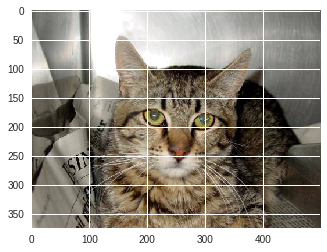

In [128]:
#Extract a subset of the files to verify they're there, and then show one image to check the image itself
files = os.listdir(f'{PATH}valid/cats')[:5]
files
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [129]:
#Run a pre-trained model (Resnet) on the system to assess baseline performance
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 68066409.63it/s]


100%|██████████| 32/32 [00:13<00:00,  2.31it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.061599   0.025327   0.993     
    1      0.056226   0.025609   0.9915    



[array([0.02561]), 0.9915]

In [132]:
data.val_y
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape
log_preds[:10]

array([[ -0.00046,  -7.67899],
       [ -0.00774,  -4.86531],
       [ -0.00003, -10.38615],
       [ -0.00005,  -9.92807],
       [ -0.00008,  -9.49212],
       [ -0.00391,  -5.54526],
       [ -0.00134,  -6.61835],
       [ -0.00046,  -7.68391],
       [ -0.00005,  -9.83718],
       [ -0.00015,  -8.83217]], dtype=float32)